# Visualizing the effects of the 2017 Thomas Fire in Santa Barbara County through true and false color imagery

[Github Repository](https://github.com/jocardelle/thomas-fire-aqi)

## About

The Thomas Fire, which burned across Santa Barbara and Ventura counties in December 2017, has been one of California’s largest wildfires, devastating over 280,000 acres of land. The fire started on December 4, 2017 and was considered contained on January 2, 2018. In this task,  I visualized the effects of the fire on the land through using true and false color imagery.



## Highlights
- Selecting data from large datasets 
- Reprojecting data
- Mapping multiple data types together
- True vs. false color imagery

## Datasets

The fire perimeter data was obtained from https://catalog.data.gov/dataset/california-fire-perimeters-all-b3436. It contains the spatial distribution of large fires in California. It covers fires that date back to 1878.

The landsat data was obtained from https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2 and is from January 26, 2018. The fire perimeter data is from https://catalog.data.gov/dataset/california-fire-perimeters-all-b3436 and was accessed through the server at `/courses/EDS220/data/hwk4_landsat_data landsat8-2018-01-26-sb-simplified.nc`. It contains the spatial distribution of large fires in California and was pre-processed to remove data outside land and coarsen the spatial resolution.

### Load necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os              
import geopandas as gpd
import rioxarray as rioxr

## Read in data

The fire perimeter and landsat data can be downloaded from the data folder using `geopandas` and `rasterio`, respectively.

In [2]:
# California fire perimeters data
fp = os.path.join('data','California_Fire_Perimeters','California_Fire_Perimeters_(all).shp')
fire_perimeter = gpd.read_file(fp)

# Landsat data
fp2 = os.path.join('data','landsat8-2018-01-26-sb-simplified.nc')
landsat = rioxr.open_rasterio(fp2)

## True & false color imagery

### Data exploration

In order to familiarize myself with the fire perimeter data I use data exploration techniques including finding if the CRS is projected or geographic.

In [3]:
# Find CRS, if its projected or graphic, ellipsoid, and datum of df
print(f"{'The CRS is:':<25} {fire_perimeter.crs}")
print(f"{'Is the CRS geographic?:':<25} {fire_perimeter.crs.is_geographic}")
print(f"{'Is the CRS projected?:':<25} {fire_perimeter.crs.is_projected}")
print(f"{'ellipsoid:':<25} {fire_perimeter.crs.ellipsoid}")
print(f"{'datum:':<25} {fire_perimeter.crs.datum}")

The CRS is:               EPSG:3857
Is the CRS geographic?:   False
Is the CRS projected?:    True
ellipsoid:                WGS 84
datum:                    World Geodetic System 1984 ensemble


In [4]:
# View the first three rows of the df
fire_perimeter.head(3)

,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,C_METHOD,OBJECTIVE,GIS_ACRES,COMMENTS,COMPLEX_NA,IRWINID,FIRE_NUM,COMPLEX_ID,DECADES,geometry
0,2023,CA,CDF,SKU,WHITWORTH,00004808,2023-06-17,2023-06-17,5,1,1,5.72913,None,None,{7985848C-0AC2-4BA4-8F0E-29F778652E61},None,None,2020,"POLYGON ((-13682443.000 5091132.739, -13682445..."
1,2023,CA,LRA,BTU,KAISER,00010225,2023-06-02,2023-06-02,5,1,1,13.60240,None,None,{43EBCC88-B3AC-48EB-8EF5-417FE0939CCF},None,None,2020,"POLYGON ((-13576727.142 4841226.161, -13576726..."
2,2023,CA,CDF,AEU,JACKSON,00017640,2023-07-01,2023-07-02,2,1,1,27.81450,None,None,{B64E1355-BF1D-441A-95D0-BC1FBB93483B},None,None,2020,"POLYGON ((-13459243.000 4621236.000, -13458968..."


In [5]:
# Find the size of the df
fire_perimeter.shape

(22261, 19)

In [6]:
# Find what years are included in the df
fire_perimeter['YEAR_'].unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013,
       2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002,
       2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991,
       1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980,
       1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969,
       1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958,
       1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950, 1949, 1948, 1947,
       1946, 1945, 1944, 1943, 1942, 1941, 1940, 1939, 1938, 1937, 1936,
       1935, 1934, 1933, 1932, 1931, 1930, 1929, 1928, 1927, 1926, 1925,
       1924, 1923, 1922, 1921, 1920, 1919, 1918, 1917, 1916, 1915, 1914,
       1913, 1912, 1911, 1910, 1909, 1908, 1907, 1906, 1905, 1903, 1902,
       1900, 1898, 1896, 1895, 1878,    0])

In [7]:
# Find what agencies are included in the df
fire_perimeter['AGENCY'].unique()

array(['CDF', 'LRA', 'CCO', 'FWS', 'USF', 'NPS', 'BLM', 'BIA', 'DOD',
       None, 'OTH'], dtype=object)

Through the initial data exploration, we found the CRS is EPSG 3857. We also found the data is projected and not geographic and the ellipsoid is WGS 84. We viewed the first three columns of the dataframe and was able to look at the different column names. We then looked at the shape of the df and found there are 22261 rows and 19 columns. We also looked at the years that this df covers and the yeaers span from 1878-2023 with a year 0 as well. The agencies included in this df are 'CDF', 'LRA', 'CCO', 'FWS', 'USF', 'NPS', 'BLM', 'BIA', 'DOD', 'OTH', and none.

### Selecting data

Next, I want to find subset the data to contain just the information regarding the Thomas Fire of 2017.

In [8]:
# Select the Thomas Fire in 2017 and save to new variable
thomas_fire = fire_perimeter[(fire_perimeter['FIRE_NAME'] == "THOMAS") & (fire_perimeter['YEAR_'] == 2017)] 
thomas_fire.head()

,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,C_METHOD,OBJECTIVE,GIS_ACRES,COMMENTS,COMPLEX_NA,IRWINID,FIRE_NUM,COMPLEX_ID,DECADES,geometry
2654,2017,CA,USF,VNC,THOMAS,00003583,2017-12-04,2018-01-12,9,7,1,281791.0,CONT_DATE based on Inciweb,None,None,None,None,2010,"MULTIPOLYGON (((-13316089.016 4088553.040, -13..."


### Landsat data

Now, I want to explore the leandsat data.

In [9]:
landsat

<xarray.Dataset> Size: 25MB
Dimensions:      (band: 1, x: 870, y: 731)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (band, y, x) float64 5MB ...
    green        (band, y, x) float64 5MB ...
    blue         (band, y, x) float64 5MB ...
    nir08        (band, y, x) float64 5MB ...
    swir22       (band, y, x) float64 5MB ...

Through the data exploration I can see it has 4 dimensions which are band, x, y, and spatial_ref. The band and spatial_ref are `int64` and x and y are `float64`. We then have 5 data variables: red, green, blue, nir08, and swir22.

### Selecting data
I want to drop the band dimensions of the data

In [10]:
# Drop band dimension in landsat
landsat = landsat.squeeze().drop_vars("band")

### Match CRSs

It's important to make sure the CRSs of the `landsat` data and `thomas_fire` data match so we can map them together.

In [11]:
# Find the CRS of the landsat and thomas_fire data
print(f"{'The CRS of landsat is:':<27} {landsat.rio.crs}")
print(f"{'The CRS of thomas_fire is:':<27} {thomas_fire.crs}")

The CRS of landsat is:      EPSG:32611
The CRS of thomas_fire is:  EPSG:3857


In [12]:
# Reproject thomas_fire crs and verify they match
thomas_fire = thomas_fire.to_crs(landsat.rio.crs)
print('Matched CRS?',  thomas_fire.crs == landsat.rio.crs)

Matched CRS? True


### True color imagery

I created a map of true color imagery and the Thomas Fire boundary to see if true color imagery captures the effects of the fire on the land.

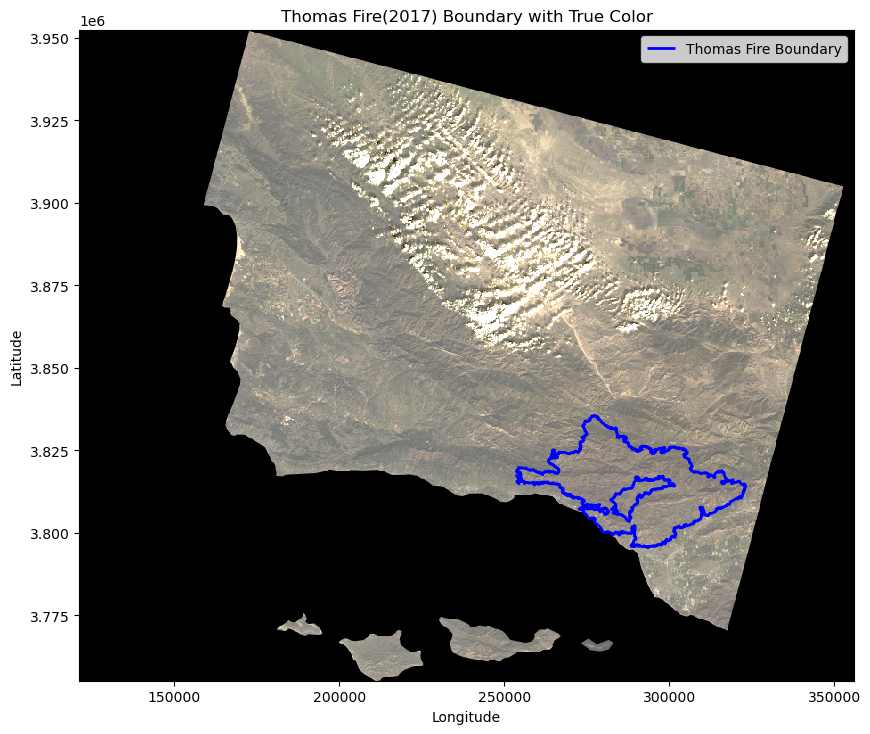

In [13]:
# Create map with ftrue color image and the Thomas Fire boundary
fig, ax = plt.subplots(figsize = (10, 10)) # Setup plot
landsat[['red', 'green', 'blue']].to_array().plot.imshow(ax = ax, robust = True) # Plot the landsat bands

thomas_fire.boundary.plot(ax = ax, edgecolor = 'blue', linewidth = 2, label="Thomas Fire Boundary") # Plot the thomas fire data on same plot

ax.set_title("Thomas Fire(2017) Boundary with True Color") # Set title
ax.set_xlabel("Longitude") # Set x axis label
ax.set_ylabel("Latitude")# Set y axis label
ax.legend() # Make legend

plt.show() # Show map

This map is showing a section of California that includes Ventura and Santa Barbara counties with true color imagery. The bands included in this true color image are red, green, and blue. The Thomas Fire of 2017 boundary is outlined shown in blue. From this true color image, you can not see any impact of the fire. The area where the fire took place looks similar to surrounding areas. This satellite imagery was from 1/26/2018 and the Thomas Fire started 12/4/2017 and was contained on 1/12/2018. This imagery is therefore taken shortly after the fire was contained.

### False color imagery

I created a map of false color imagery and the Thomas Fire boundary to view the effects of the fire on the land.

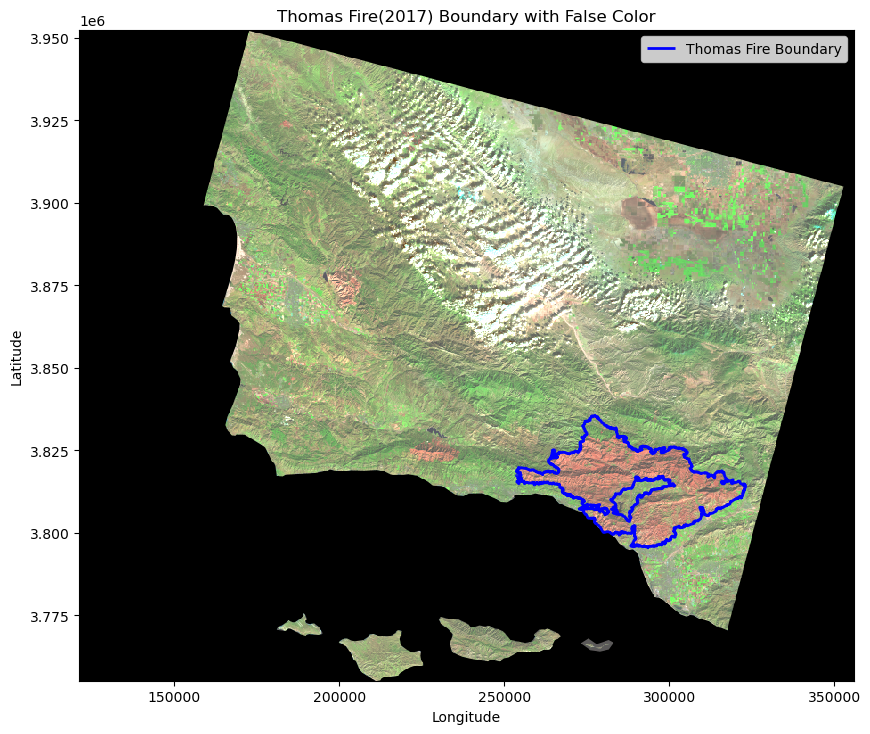

In [14]:
# Create map with false color image and the Thomas Fire boundary
fig, ax = plt.subplots(figsize = (10, 10)) # Setup plot
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(ax = ax, robust = True) # Plot the landsat bands

thomas_fire.boundary.plot(ax = ax, edgecolor = 'blue', linewidth = 2, label="Thomas Fire Boundary") # Plot the thomas fire data on same plot

ax.set_title("Thomas Fire(2017) Boundary with False Color") # Set title
ax.set_xlabel("Longitude") # Set x axis label
ax.set_ylabel("Latitude")# Set y axis label
ax.legend() # Make legend

plt.show() # Show map

This map is showing a section of California that includes Ventura and Santa Barbara counties with false color imagery. The bands included in this false color image are short wave infared(SWIR), near infared(NIR), and red. The Thomas Fire of 2017 boundary is outlined shown in blue. Compared to the true color image, you can see a drastic difference in areas where the fire took place and areas that were not burned. Recently burned areas appear red due to the fact that they highly reflect shortwave infared. You can see the red inside the Thomas Fire boundary. This satellite imagery was from 1/26/2018 and the Thomas Fire started 12/4/2017 and was contained on 1/12/2018. This imagery is therefore taken shortly after the fire was contained.

Information on false color imagery was obtained from:

- https://earthobservatory.nasa.gov/features/FalseColor
- https://www.usgs.gov/faqs/what-are-band-designations-landsat-satellites
- https://www.usgs.gov/media/images/common-landsat-band-combinations